In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
# Load the dataset
df = pd.read_csv("Data.csv")



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27743 entries, 0 to 27742
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   m49_code                  27743 non-null  int64  
 1   country                   27743 non-null  object 
 2   region                    1317 non-null   object 
 3   cpc_code                  27743 non-null  object 
 4   commodity                 27743 non-null  object 
 5   year                      27743 non-null  int64  
 6   loss_percentage           27743 non-null  float64
 7   loss_percentage_original  27743 non-null  object 
 8   loss_quantity             585 non-null    object 
 9   activity                  22771 non-null  object 
 10  food_supply_stage         24329 non-null  object 
 11  treatment                 1410 non-null   object 
 12  cause_of_loss             1254 non-null   object 
 13  sample_size               1323 non-null   object 
 14  method

In [ ]:
df

,m49_code,country,region,cpc_code,commodity,year,loss_percentage,loss_percentage_original,loss_quantity,activity,food_supply_stage,treatment,cause_of_loss,sample_size,method_data_collection,reference,url,notes
0,104,Myanmar,NaN,23161.02,"Rice, milled",2015,1.78,1.78%,26.12kgs,Storage,Storage,"30 days storage, with trapping",Rodents,NaN,Controlled Experiment,"Dr Steven Belmain (2015), context post-harvest...",NaN,Reference has been generated automatically
1,104,Myanmar,NaN,23161.02,"Rice, milled",2015,11.77,11.77%,88.18kgs,Storage,Storage,"60 days storage, no trapping",Rodents,NaN,Controlled Experiment,"Dr Steven Belmain (2015), context post-harvest...",NaN,Reference has been generated automatically
2,104,Myanmar,NaN,23161.02,"Rice, milled",2015,5.88,5.88%,44.09kgs,Storage,Storage,"30 days storage, no trapping",Rodents,NaN,Controlled Experiment,"Dr Steven Belmain (2015), context post-harvest...",NaN,Reference has been generated automatically
3,104,Myanmar,NaN,23161.02,"Rice, milled",2015,3.57,3.57%,52.24kgs,Storage,Storage,"60 days storage, with trapping",Rodents,NaN,Controlled Experiment,"Dr Steven Belmain (2015), context post-harvest...",NaN,Reference has been generated automatically
4,104,Myanmar,NaN,23161.02,"Rice, milled",2015,17.65,17.65%,132.27kgs,Storage,Storage,"90 days storage, no trapping",Rodents,NaN,Controlled Experiment,"Dr Steven Belmain (2015), context post-harvest...",NaN,Reference has been generated automatically
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27738,894,Zambia,"Chivuna, Chalimbana,",0112,Maize (corn),1977,13.00,13,NaN,NaN,Storage,NaN,Insects,20,Case Study,Adams & Harman,http://gala.gre.ac.uk/10767/,NaN
27739,894,Zambia,NaN,0112,Maize (corn),1977,15.00,9.0-21,NaN,NaN,Storage,NaN,NaN,NaN,Literature Review,"(Adams and Harman, 1977)",https://www.nap.edu/catalog/20028/postharvest-...,NaN
27740,894,Zambia,NaN,0114,Sorghum,1977,5.00,0-10,NaN,NaN,Whole supply chain,NaN,NaN,NaN,Literature Review,"(fPI, 1977)",https://www.nap.edu/catalog/20028/postharvest-...,NaN
27741,894,Zambia,NaN,0118,Millet,1977,10.00,10,NaN,NaN,Storage,NaN,On-Farm Storage,NaN,Literature Review,FAO 1977b,https://www.nap.edu/catalog/20028/postharvest-...,NaN


Epoch 1/10
694/694 [==============================] - 4s 4ms/step - loss: 29.4884 - val_loss: 23.3163
Epoch 2/10
694/694 [==============================] - 3s 4ms/step - loss: 20.2104 - val_loss: 21.3420
Epoch 3/10
694/694 [==============================] - 2s 3ms/step - loss: 18.7025 - val_loss: 20.8808
Epoch 4/10
694/694 [==============================] - 3s 4ms/step - loss: 17.9147 - val_loss: 21.2132
Epoch 5/10
694/694 [==============================] - 2s 3ms/step - loss: 17.4076 - val_loss: 20.8342
Epoch 6/10
694/694 [==============================] - 2s 3ms/step - loss: 17.0794 - val_loss: 20.5863
Epoch 7/10
694/694 [==============================] - 3s 4ms/step - loss: 16.8137 - val_loss: 20.8766
Epoch 8/10
694/694 [==============================] - 2s 3ms/step - loss: 16.5342 - val_loss: 20.7389
Epoch 9/10
694/694 [==============================] - 2s 3ms/step - loss: 16.3586 - val_loss: 20.7302
Epoch 10/10
87/87 [==============================] - 0s 2ms/step - loss: 17.0408
T

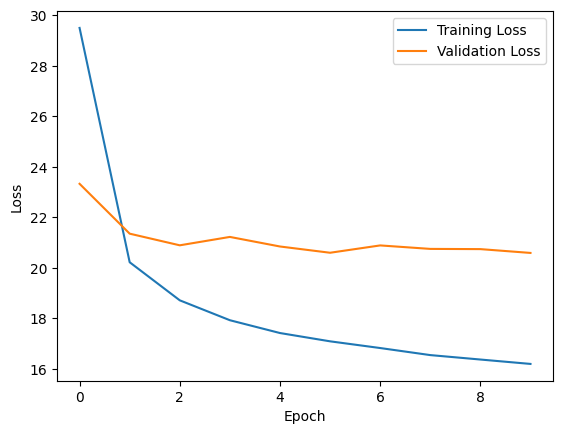

In [ ]:
# Select features and target variable
columns_to_exclude = ['loss_percentage', 'loss_percentage_original', 'region', 'loss_quantity',
                      'activity', 'food_supply_stage', 'treatment', 'cause_of_loss',
                      'sample_size', 'method_data_collection', 'reference', 'url', 'notes']
X = df.drop(columns=columns_to_exclude)
y = df['loss_percentage']

# Split the dataset into training, validation, and testing sets
X_train, X_val_test, y_train, y_val_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size=0.5, random_state=42)

# Define column transformer for preprocessing
categorical_columns = ['country', 'cpc_code', 'commodity']
numeric_columns = [col for col in X_train.columns if col not in categorical_columns]

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_columns),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns)
    ],
    remainder='passthrough'
)

# Fit and transform the preprocessing pipeline on training data
X_train_scaled = preprocessor.fit_transform(X_train)
X_val_scaled = preprocessor.transform(X_val)
X_test_scaled = preprocessor.transform(X_test)

# Convert sparse matrices to dense matrices
X_train_scaled = X_train_scaled.toarray()
X_val_scaled = X_val_scaled.toarray()
X_test_scaled = X_test_scaled.toarray()

# Build the neural network model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_data=(X_val_scaled, y_val))

# Evaluate the model
test_loss = model.evaluate(X_test_scaled, y_test)
print(f"Test Loss: {test_loss}")

# Optionally, you can visualize the training process
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
X_train

,m49_code,country,cpc_code,commodity,year
13499,50,Bangladesh,0113,Rice,2009
22826,834,United Republic of Tanzania,01701,"Beans, dry",2011
23589,840,United States of America,01229,Cantaloupes and other melons,2012
13912,508,Mozambique,0113,Rice,2013
18578,706,Somalia,0112,Maize (corn),2011
...,...,...,...,...,...
21575,800,Uganda,0111,Wheat,2017
5390,270,Gambia,01193,Fonio,2021
860,120,Cameroon,0113,Rice,2003
15795,586,Pakistan,0111,Wheat,2013


In [ ]:
y_train

13499    0.13
22826    0.65
23589    8.00
13912    1.25
18578    4.00
         ... 
21575    3.50
5390     0.30
860      1.25
15795    1.18
23654    8.00
Name: loss_percentage, Length: 22194, dtype: float64

In [ ]:
X_test

,m49_code,country,cpc_code,commodity,year
9822,404,Kenya,0112,Maize (corn),2012
9000,384,Côte d'Ivoire,0112,Maize (corn),2012
1940,180,Democratic Republic of the Congo,0118,Millet,2013
19872,72,Botswana,0118,Millet,2012
7721,356,India,01319,"Other tropical and subtropical fruits, n.e.c.",2014
...,...,...,...,...,...
9008,384,Côte d'Ivoire,0113,Rice,2012
27387,894,Zambia,0111,Wheat,2009
7808,356,India,0142,"Groundnuts, excluding shelled",2014
24652,840,United States of America,21397.01,Canned mushrooms,1999


In [ ]:
 y_test

9822      1.30000
9000      2.35789
1940      1.17500
19872     2.50000
7721      0.03000
           ...   
9008      1.25000
27387     1.00000
7808      0.06000
24652    35.00000
26712     1.00000
Name: loss_percentage, Length: 2775, dtype: float64

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Predict loss_percentage values for the testing set
y_pred = model.predict(X_test_scaled)

# Convert the predicted and true values to integers (assuming rounding for regression)
y_pred_int = np.round(y_pred).astype(int)
y_test_int = np.round(y_test).astype(int)

# Create the confusion matrix
conf_matrix = confusion_matrix(y_test_int, y_pred_int)

# Display the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)



87/87 [==============================] - 0s 2ms/step
Confusion Matrix:
[[ 0  0  0 ...  0  0  0]
 [ 1  0 12 ...  0  0  0]
 [ 0  0 17 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]]


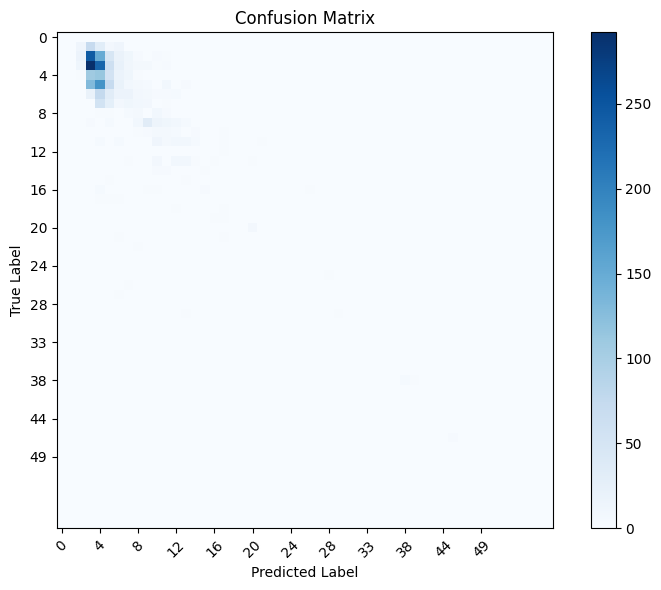

In [ ]:

# Visualize Confusion Matrix
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, cmap='Blues', interpolation='nearest')
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Limit the number of ticks on x-axis to 10
unique_labels = np.unique(y_test_int)
step_size = max(1, len(unique_labels) // 10)
plt.xticks(np.arange(0, len(unique_labels), step_size), unique_labels[::step_size], rotation=45)

# Limit the number of ticks on y-axis to 10
plt.yticks(np.arange(0, len(unique_labels), step_size), unique_labels[::step_size])

plt.tight_layout()
plt.show()

In [ ]:
input_shape = X_train_scaled.shape[1]


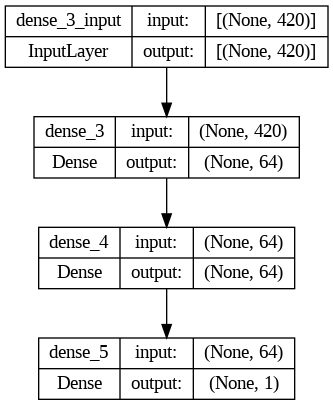

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Build your model
model = Sequential([
    Dense(64, activation='relu', input_shape=(input_shape,)),
    Dense(64, activation='relu'),
    Dense(1)
])

# Compile and train your model

# Save the model's graph
tf.keras.utils.plot_model(model, to_file='model_graph.png', show_shapes=True)
